# 01. Importing the Dependencies

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# 02. Data Collection

In [43]:
# loading the dataset from csv file to pandas Dataframe
big_mart_data = pd.read_csv("/content/big_mart_data/Train.csv")

# import the first 5 raws of the dataset
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
# Determine the number of data poins and number of features
big_mart_data.shape

(8523, 12)

In [45]:
# get the information about the data set
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 03. Data preprocessing

**Categorical Features in this data set**
 - Item_Identifier
 - Item_Fat_Content
 - Item_Type
 - Outlet_Identifier
 - Outlet_Size
 - Outlet_Location_Type
 - Outlet_Type

In [46]:
# checking for the missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [47]:
# list categorical and numerical features
categorical_features = big_mart_data.select_dtypes(include=['object']).columns.to_list()
numerical_features = big_mart_data.select_dtypes(exclude=['object']).columns.to_list()

print("Categorical Features:",categorical_features)
print("Numerical Features:",numerical_features)

Categorical Features: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Features: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


### 3.1 Handling the missing values

We need two parameters to handle the missing values


1.   Mean (Average value)
2.   Mode (Most repeated value)

##### 3.1.1 Handling the missing values of Item weight with mean

In [48]:
# calculate the mean value of item weight column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [80]:
# impute the missing values in Item_Weight column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [50]:
# rechecking for the missing values in item weight column
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### 3.1.2 Handling the missing values of Outlet size with mode

The "Outlet_Size" is belongs to categorical data. We can handle the missing values by replacing the corresponding mode value of the "Outlet_Size" that correlated with Outlet_Type.

In [51]:
mode_of_outlet_size = big_mart_data.pivot_table(values="Outlet_Size" , columns="Outlet_Type" , aggfunc=(lambda x: x.mode()[0]))

In [52]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [53]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [54]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [55]:
#replacing the missing values in outlet size
big_mart_data.loc[missing_values, "Outlet_Size"] = big_mart_data.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size )

In [56]:
#rechecking the missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#04. Data Analysis

In [57]:
# Descriptive statistics of the data set
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### 4.1 Numerical Features

In [58]:
sns.set()

<ipython-input-59-db928ba68af2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data.Item_Weight)


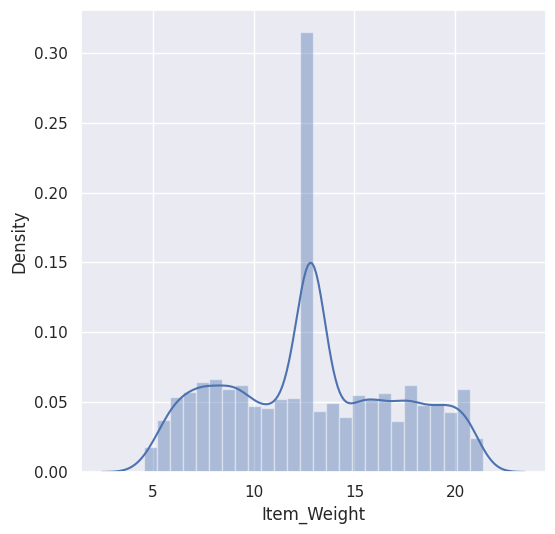

In [59]:
# Item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data.Item_Weight)
plt.show()



*   The average item weight is between 12-13 kg.



<ipython-input-60-e5055a444de2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data.Item_Visibility)


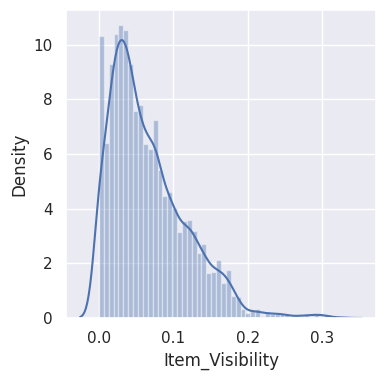

In [60]:
# Item_Visibility distribution
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data.Item_Visibility)
plt.show()



*   The average Item_Visibility is around 0.06



<ipython-input-61-b76ab39a24c9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data.Item_MRP)


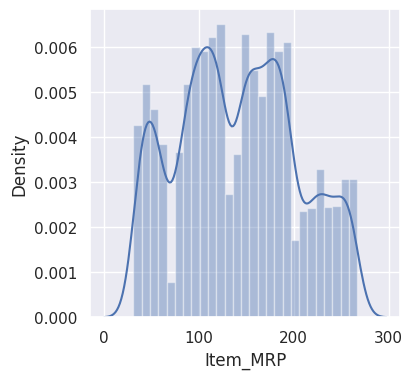

In [61]:
# Item_MRP distribution
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data.Item_MRP)
plt.show()



*   The average Item_MRP is close to 150 USD.



In [62]:
# Average Item_MRP
big_mart_data['Item_MRP'].mean()

140.9927819781767

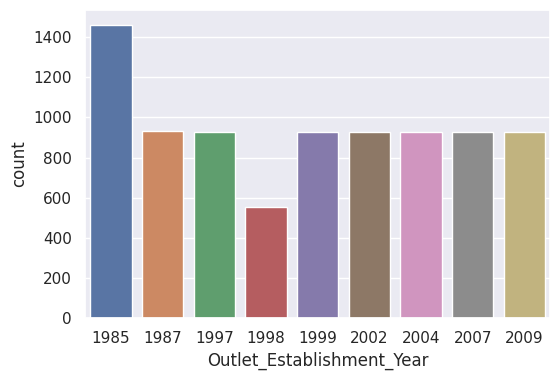

In [63]:
# Outlet_Establishment_Year Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=big_mart_data.Outlet_Establishment_Year)
plt.show()

* Most of the outlets were established in 1985.
* Except for 1998, outlets were established at approximately the same rate in other years.
* In 1998, there is a significant drop in establishing outlets.

<ipython-input-64-cf2aac072c2c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data.Item_Outlet_Sales)


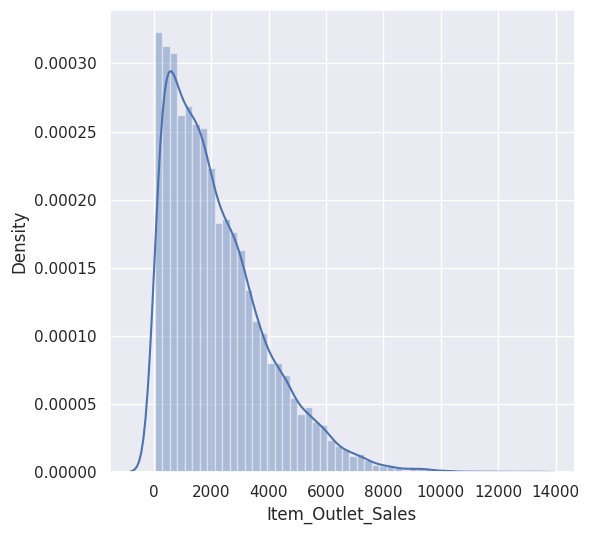

In [64]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data.Item_Outlet_Sales)
plt.show()

* The average Item_Outlet_Sales is close to 2000 USD.



### 4.2 Categorical Features

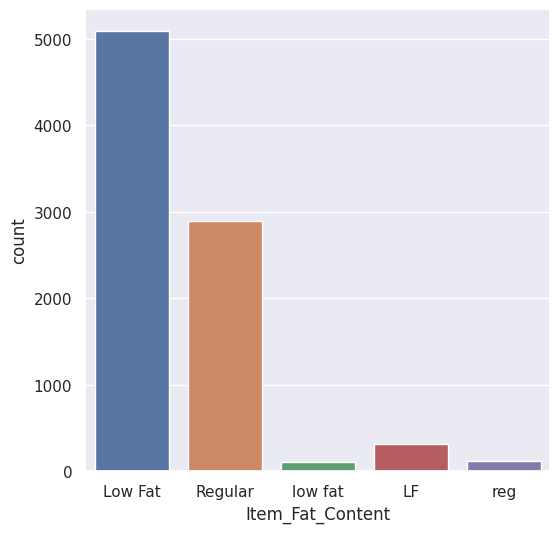

In [65]:
# Item_Fat_Content Distribution
plt.figure(figsize=(6,6))
sns.countplot(x = big_mart_data.Item_Fat_Content)
plt.show()



*   We can see that the same data has been entered in different ways.
*   Therefore, we need to clean "low fat", "LF" data by replacing "Low Fat".
*   Also, we need to clean  "reg" data by replacing "Regular".



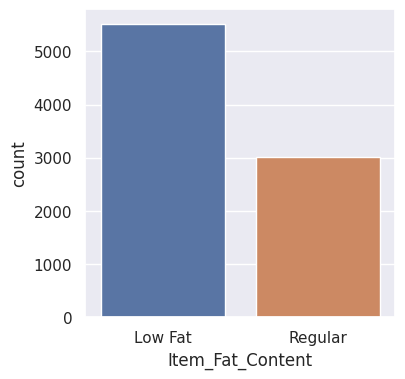

In [66]:
# Standardize the values in 'Item_Fat_Content' column
big_mart_data.replace({'Item_Fat_Content': {'low':'Low Fat','LF':'Low Fat','low fat':'Low Fat', 'reg': 'Regular', }}, inplace = True)

# Re creating the Item_Fat_Content Distribution
plt.figure(figsize=(4,4))
sns.countplot(x = big_mart_data.Item_Fat_Content)
plt.show()

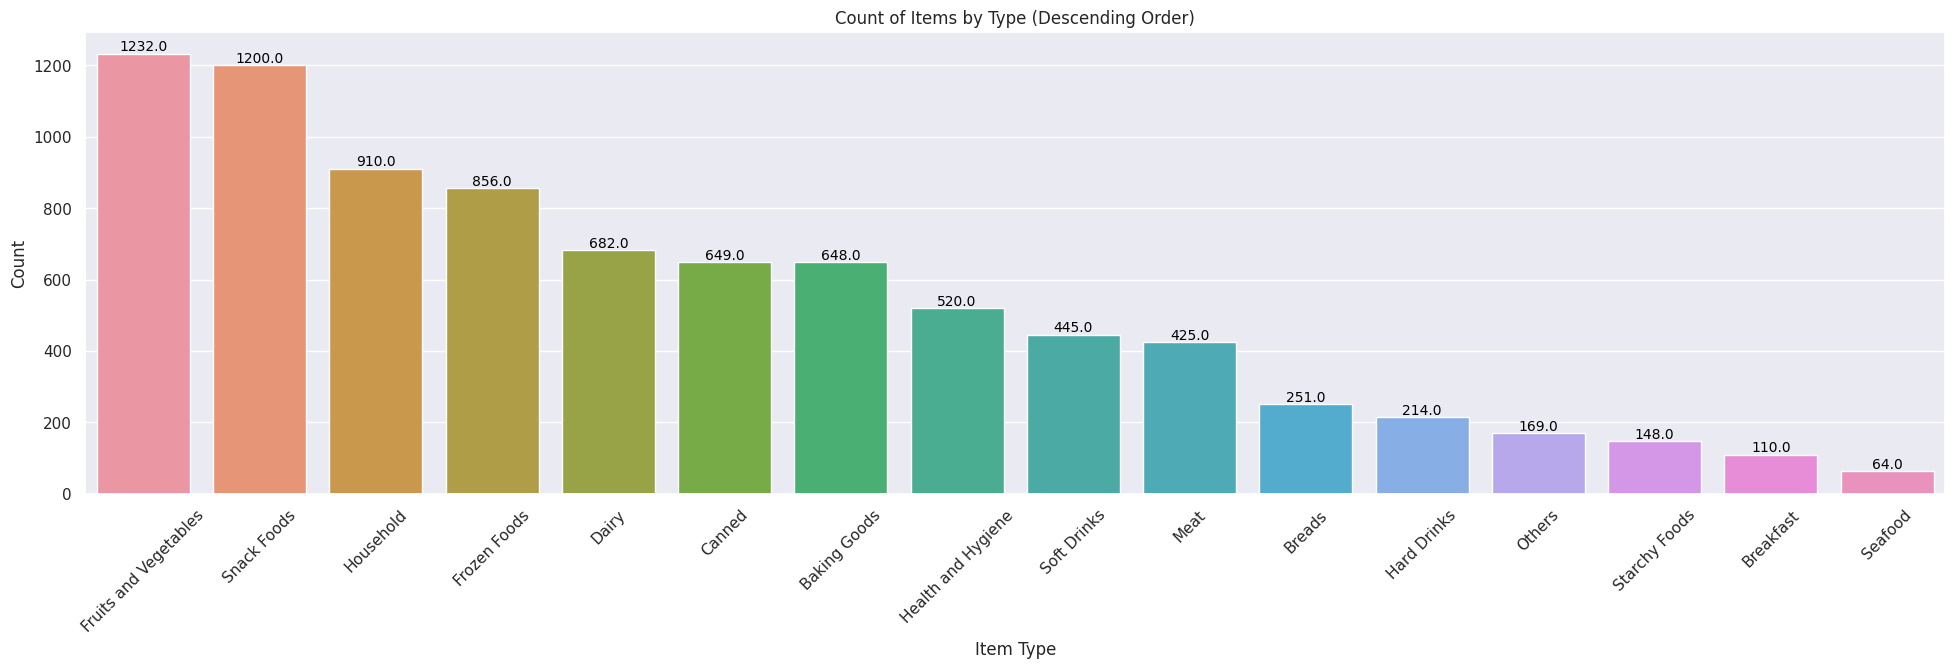

In [67]:
# Item_Type Distribution
# Calculate the count of each item type and sort in descending order
item_type_counts = big_mart_data['Item_Type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(24, 6))
ax = sns.countplot(data=big_mart_data, x='Item_Type', order=item_type_counts.index)
plt.xticks(rotation=45)
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.title('Count of Items by Type (Descending Order)')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

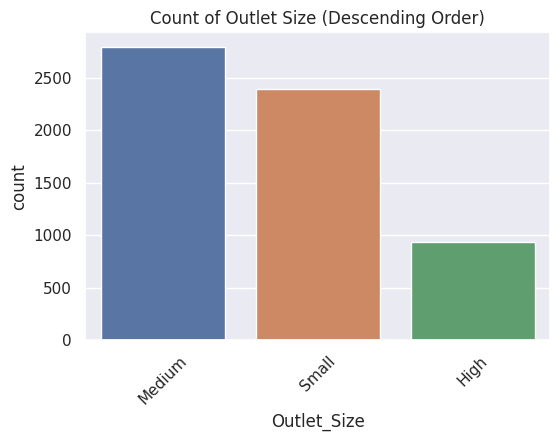

In [70]:
# Creating the Outlet_Size Distribution
big_mart_data = pd.read_csv("/content/big_mart_data/Train.csv")
plt.figure(figsize=(6,4))
sns.countplot(x = big_mart_data.Outlet_Size, order=big_mart_data.Outlet_Size.value_counts().sort_values(ascending=False).index)
plt.title('Count of Outlet Size (Descending Order)')
plt.xticks(rotation=45)

plt.show()

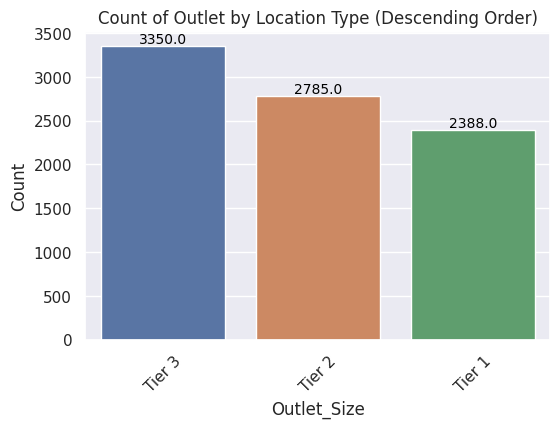

In [71]:
# Calculate the count of each Outlet_Location_Type and sort in descending order
Outlet_Location_Type_counts = big_mart_data['Outlet_Location_Type'].value_counts().sort_values(ascending=False)

# Create a countplot for "Item_Type" in descending order
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=big_mart_data, x='Outlet_Location_Type', order=Outlet_Location_Type_counts.index)
plt.xticks(rotation=45)
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.title('Count of Outlet by Location Type (Descending Order)')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

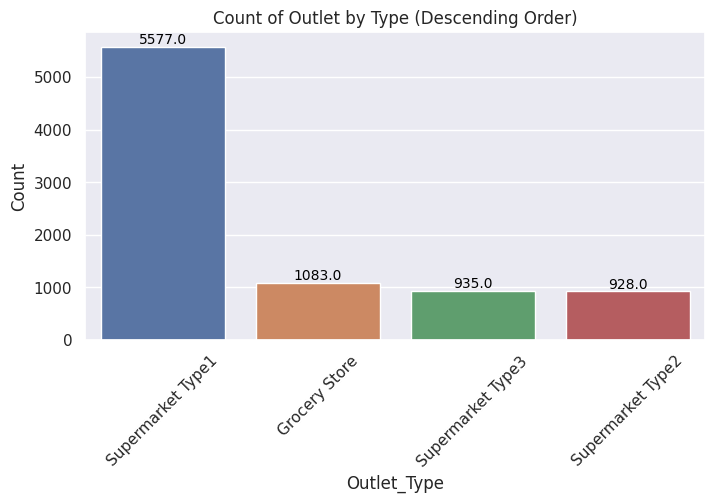

In [72]:
# Calculate the count of each Outlet_Type and sort in descending order
Outlet_Type_counts = big_mart_data['Outlet_Type'].value_counts().sort_values(ascending=False)

# Create a countplot for "Item_Type" in descending order
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=big_mart_data, x='Outlet_Type', order=Outlet_Type_counts.index)
plt.xticks(rotation=45)
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.title('Count of Outlet by Type (Descending Order)')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#05. Lable Encoding

In [73]:
encoder = LabelEncoder()
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [83]:
# Item_Identifier
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
# Item_Fat_Content
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
# Item_Type
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
# Outlet_Identifier
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
# Outlet_Size
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
# Outlet_Location_Type
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
# Outlet_Type
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [86]:
big_mart_data.head(11)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930000,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,2,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,2,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,1,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,2,0.016687,5,96.9726,7,2002,3,1,1,1076.5986
9,990,19.200000,2,0.094450,5,187.8214,2,2007,3,1,1,4710.5350


# 06. Splitting Features and Target

In [87]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
# if you are removing a column you need to specify axis = 1

Y = big_mart_data['Item_Outlet_Sales']

print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [88]:
#rechecking the missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [89]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# 07. Splitting the data into training data , Testing data



*   X_train = training data
*   Y_train = target variable




In [93]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [95]:
# Print the shape of the training and test sets
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


In [96]:
# Print the shape of the training, test, and original data sets
print(X.shape,X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#08. Training the machine learning model

In [107]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [108]:
# Train the model on the training data
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# 09. Evaluation of Regression model

### 9.1 Predictions on Training Data

In [109]:
# Make predictions on the training data
training_data_prediction = regressor.predict(X_train)



*   Y_train = The original Y value that gives the actual output (Target variable for the training data. It is the variable that we are trying to predict.

*   X_Train = Target variable for the training data. It is the data that you are using to predict the target variable.

*   training_data_prediction = The variable that stored the predicted value. So, it gives the predicted output for the training data. It is the output of the model when it is given the training data as input.



In [111]:
# R Squared value
r2_train = metrics.r2_score(Y_train,training_data_prediction)

# Print R Squared value
print('R Squared value : ', r2_train)

R Squared value :  0.6376677683357845


### 9.1 Predictions on Testing Data


In [113]:
# Make predictions on the test data
test_data_prediction = regressor.predict(X_test)

In [115]:
# Calculate the R-squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Squared value : ', r2_test)

R Squared value :  0.5881605981744811


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
# Initialize the model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, Y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(Y_test, y_pred_linear)
r2_linear = r2_score(Y_test, y_pred_linear)

# Print the results
print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression:
Mean Squared Error: 1585036.7376738917
R-squared: 0.486557052765611


In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
# Initialize the model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_reg.fit(X_train, Y_train)

# Make predictions
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

# Print the results
print("Random Forest Regression:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Regression:
Mean Squared Error: 1380126.5610281255
R-squared: 0.5529338644284885


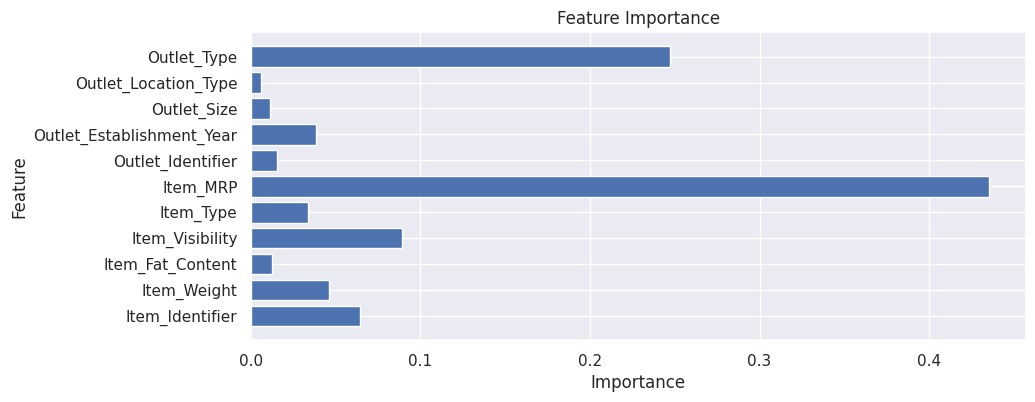

In [121]:
# Initialize the model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
random_forest_reg.fit(X_train, Y_train)

# Calculate feature importances
feature_importances = random_forest_reg.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 4))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [122]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [123]:
# Initialize the model with scaling
svr_reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

# Fit the model
svr_reg.fit(X_train, Y_train)

# Make predictions
y_pred_svr = svr_reg.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)

# Print the results
print("Support Vector Regression (SVR):")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

Support Vector Regression (SVR):
Mean Squared Error: 2975386.2366156927
R-squared: 0.036179388037056115


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [134]:
# Initialize the random forest regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = random_forest_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 1380126.5610281255
R-squared: 0.5529338644284885
Root Mean Squared Error: 1174.787879162926


In [136]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(random_forest_reg, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Take the absolute value of the scores and calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print RMSE scores for each fold
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

# Fit the model to the entire training data
random_forest_reg.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = random_forest_reg.predict(X_test)

Cross-Validation RMSE Scores: [1109.45221872 1106.35980958 1164.85788363 1083.87841534 1147.85812366]
Mean RMSE: 1122.4812901851553


In [139]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared on the test data
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the results
print("Test MSE:", mse)
print("Test R-squared:", r2)

Test MSE: 1380126.5610281255
Test R-squared: 0.5529338644284885
